In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ILP_All_Cleaned.csv")
df.head(5)

,Age,Student?,Annual_Income,Purchased_before?,Reason_for_Purchasing,Channels_Used,Rank_Channel_Used1,Rank_Channel_Used2,Rank_Channel_Used3,Improvements,...,Complexity of the plans_RNP,Unnecessary_RNP,Not enough money_RNP,Lack of information_RNP,Others_RNP,Lack of information_RNInt,Unnecessary_RNInt,Financial difficulties_RNInt,Not willing to take the risk_RNInt,Others_RNInt
0,22 to 36 years old,yes,no income,no,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
1,22 to 36 years old,yes,no income,no,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
2,22 to 36 years old,no,"$25,000 and below",yes,higher potential returns;free switching of fun...,youtube,seedly,reddit,yahoo fice,p,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
3,22 to 36 years old,yes,no income,no,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,i prefer to do investment myself to gain exper...,0.0,0.0,0.0,0.0,NaN
4,22 to 36 years old,yes,no income,no,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 42 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             144 non-null    object 
 1   Student?                                        144 non-null    object 
 2   Annual_Income                                   144 non-null    object 
 3   Purchased_before?                               144 non-null    object 
 4   Reason_for_Purchasing                           9 non-null      object 
 5   Channels_Used                                   9 non-null      object 
 6   Rank_Channel_Used1                              9 non-null      object 
 7   Rank_Channel_Used2                              9 non-null      object 
 8   Rank_Channel_Used3                              9 non-null      object 
 9   Improvements                               

In [4]:
# Extract only the required columns & drop empty rows
improvements_df = df[["Improvements"]]
improvements_df = improvements_df.dropna()

opinions_df = df[["ILP_Opinions"]]
opinions_df = opinions_df.dropna()
# opinions_df = opinions_df.drop(opinions_df[opinions_df["ILP_Opinions"].astype(str).str.match("^\s+$")].index)

## Lemmatization

In [5]:
#lemmanisation
#using spacy
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.stem import WordNetLemmatizer

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

improvements_df['lemmatised_content'] = improvements_df['Improvements'].apply(lambda x: lemmatizer(x))
opinions_df['lemmatised_content'] = opinions_df["ILP_Opinions"].apply(lambda x: lemmatizer(x))

improvements_df['lemmatised_content']=improvements_df['lemmatised_content'].str.replace('-PRON-', '')
opinions_df['lemmatised_content']=opinions_df['lemmatised_content'].str.replace('-PRON-', '')

C:\Users\65932\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\65932\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

## Tokenization

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
#tokenize the words 
improvements_df['tokenized_content'] = improvements_df['lemmatised_content'].apply(lambda x: tokenizer.tokenize(x))
opinions_df['tokenized_content'] = opinions_df['lemmatised_content'].apply(lambda x: tokenizer.tokenize(x))

## Stop words removal

In [7]:
from nltk.corpus import words
from nltk.corpus import stopwords

#remove stop words
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
#     custom_words_rm = ['insurance', 'policy', 'plan', 'year']
#     final_words = [w for w in words if w not in custom_words_rm]
    return words

words = words.words()

#remove words with length less than 3 & urls
def remove_shortwords(text):
    words = [w for w in text if len(w)>=3]
    return words

improvements_df['remove_stopwords_content'] = improvements_df['tokenized_content'].apply(lambda x: remove_stopwords(x))
opinions_df['remove_stopwords_content'] = opinions_df['tokenized_content'].apply(lambda x: remove_stopwords(x))

improvements_df['remove_shortwords_content'] = improvements_df['remove_stopwords_content'].apply(lambda x: remove_shortwords(x))
opinions_df['remove_shortwords_content'] = opinions_df['remove_stopwords_content'].apply(lambda x: remove_shortwords(x))

## POS Tagging

In [8]:
import nltk
from nltk.tokenize import word_tokenize

def POS_tagging(str_list):
    removeitem = ['i','im',"nil",'la','cant','eg','get','make','cos','whereby','']
    tokens = nltk.pos_tag(str_list)
    JJ_tokens = [i[0] for i in tokens if i[1] in ['JJ','JJS','JJR'] and i[0] not in removeitem]
    noun_tokens = [i[0] for i in tokens if i[1] in ['NN','NNS','NNP','NNPS'] and i[0] not in removeitem]
    return (JJ_tokens + noun_tokens)

improvements_df['pos_tag_content']=improvements_df['remove_shortwords_content'].apply(lambda x: POS_tagging(x))
opinions_df['pos_tag_content']=opinions_df['remove_shortwords_content'].apply(lambda x: POS_tagging(x))

## Processed Final Content

In [9]:
def join(text):
    sentence = " ".join(text)
    return sentence
improvements_df['final_content'] = improvements_df['pos_tag_content'].apply(lambda x: join(x))
opinions_df['final_content'] = opinions_df['pos_tag_content'].apply(lambda x: join(x))

In [10]:
improvements_df.head()

,Improvements,lemmatised_content,tokenized_content,remove_stopwords_content,remove_shortwords_content,pos_tag_content,final_content
2,p,p,[p],[p],[],[],
18,the benefits and how should buy one,the benefit and how should buy one,"[the, benefit, and, how, should, buy, one]","[benefit, buy, one]","[benefit, buy, one]",[benefit],benefit
29,none needed,none need,"[none, need]","[none, need]","[none, need]","[none, need]",none need
103,lower premiums,low premium,"[low, premium]","[low, premium]","[low, premium]","[low, premium]",low premium
109,a little expensive,a little expensive,"[a, little, expensive]","[little, expensive]","[little, expensive]","[little, expensive]",little expensive


In [11]:
opinions_df.head()

,ILP_Opinions,lemmatised_content,tokenized_content,remove_stopwords_content,remove_shortwords_content,pos_tag_content,final_content
1,risky,risky,[risky],[risky],[risky],[risky],risky
4,would like to know more,would like to know more,"[would, like, to, know, more]","[would, like, know]","[would, like, know]",[],
8,i dont know,i do not know,"[i, do, not, know]",[know],[know],[],
11,just another insurance scheme,just another insurance scheme,"[just, another, insurance, scheme]","[another, insurance, scheme]","[another, insurance, scheme]","[insurance, scheme]",insurance scheme
12,no idea,no idea,"[no, idea]",[idea],[idea],[idea],idea


# Wordcloud

## Improvements wordcloud

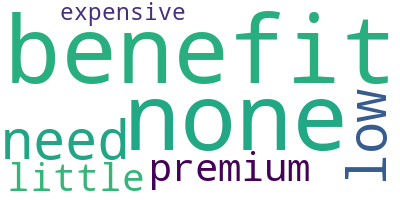

In [12]:
#!pip install wordcloud
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(improvements_df['final_content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Opinions wordcloud

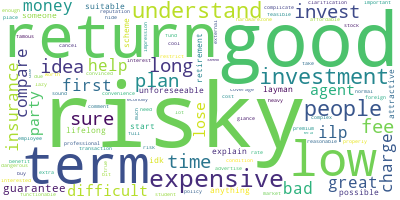

In [13]:
# Join the different processed titles together.
long_string = ','.join(list(opinions_df['final_content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Count Vectorizer

In [14]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot( counts, x_pos,palette='husl',orient = "h")
    plt.yticks(x_pos, words) 
    plt.ylabel('words')
    plt.xlabel('counts')
    plt.show()



C:\Users\65932\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


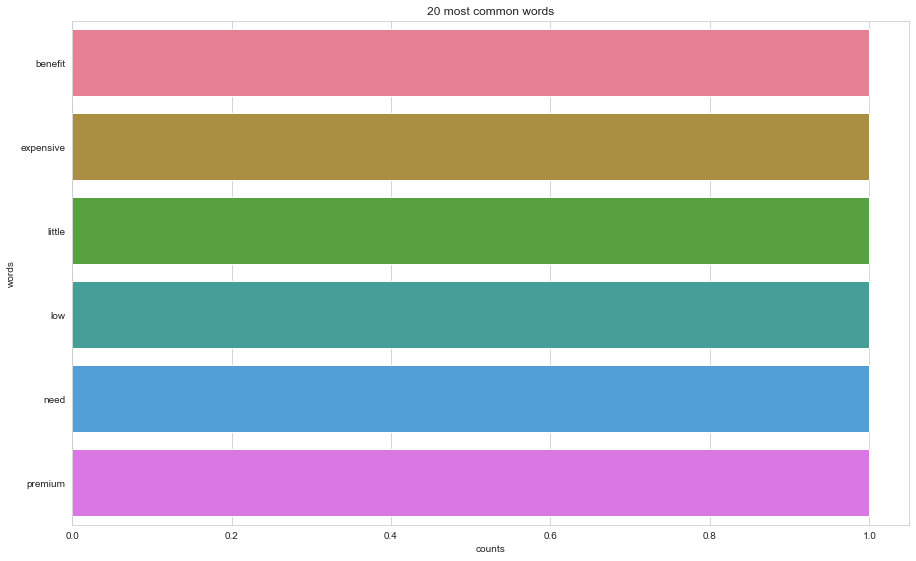

In [15]:
# Initialise the count vectorizer with the English stop words
improvements_count_vectorizer = CountVectorizer(min_df =1,max_df=3000,stop_words='english')

# Fit and transform the processed titles
improvements_count_data = improvements_count_vectorizer.fit_transform(improvements_df['final_content'])

# Visualise the 20 most common words
plot_20_most_common_words(improvements_count_data, improvements_count_vectorizer)

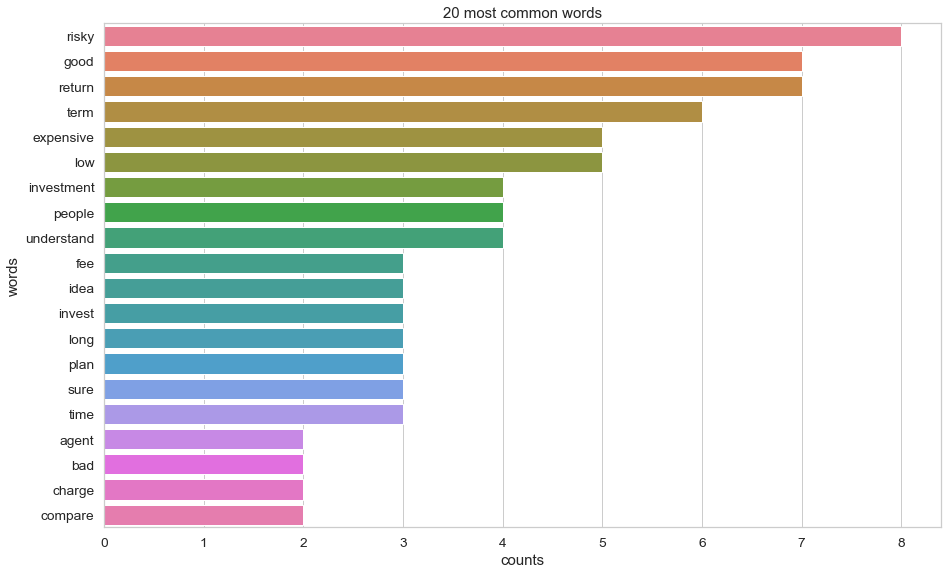

In [16]:
# Initialise the count vectorizer with the English stop words
opinions_count_vectorizer = CountVectorizer(min_df =1,max_df=3000,stop_words='english')

# Fit and transform the processed titles
opinions_count_data = opinions_count_vectorizer.fit_transform(opinions_df['final_content'])

# Visualise the 20 most common words
plot_20_most_common_words(opinions_count_data, opinions_count_vectorizer)

## LDA Model

In [17]:
# import warnings
# warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10



C:\Users\65932\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


### Improvements LDA model

In [18]:
# Create and fit the LDA model
improvements_lda = LDA(n_components=number_topics)
improvements_lda.fit(improvements_count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(improvements_lda, improvements_count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
benefit need little expensive premium low

Topic #1:
benefit need little expensive premium low

Topic #2:
premium low benefit need little expensive

Topic #3:
little expensive benefit need premium low

Topic #4:
need benefit little expensive premium low


### Opinions LDA model

In [19]:
# Create and fit the LDA model
opinions_lda = LDA(n_components=number_topics)
opinions_lda.fit(opinions_count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(opinions_lda, opinions_count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
people term long party good difficult guarantee understand return agent

Topic #1:
risky good term investment sure money restrict fund cancel condition

Topic #2:
charge fee compare lose student affordable famous extra need buy

Topic #3:
plan return investment great functionable convinced sound feasible possible retirement

Topic #4:
low expensive idea understand return time invest ilp help bad


In [20]:
improvements_df.to_csv('ILP_Improvements_Dashboard.csv', index= False)
opinions_df.to_csv('ILP_Opinions_Dashboard.csv', index= False)